In [4]:
import pandas as pd

# Load the dataset
data = pd.read_csv("/content/titanic(1).csv")


Univariate analysis involves exploring and visualizing individual variables

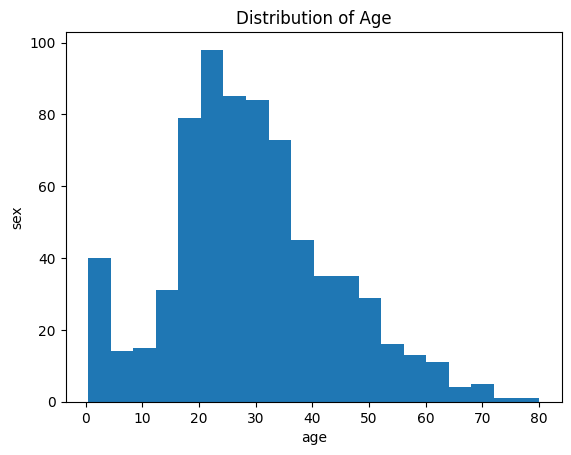

In [5]:
import matplotlib.pyplot as plt

# Histogram
plt.hist(data['age'], bins=20)
plt.xlabel('age')
plt.ylabel('sex')
plt.title('Distribution of Age')
plt.show()


Bivariate analysis involves analyzing the relationship between two variables. 

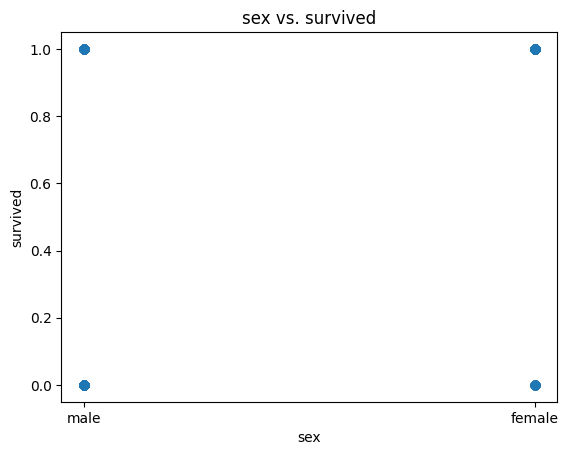

In [6]:
# Scatter plot
plt.scatter(data['sex'], data['survived'])
plt.xlabel('sex')
plt.ylabel('survived')
plt.title('sex vs. survived')
plt.show()


Multivariate analysis involves analyzing the relationship between three or more variables. 

<ipython-input-7-dccd9025177a>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


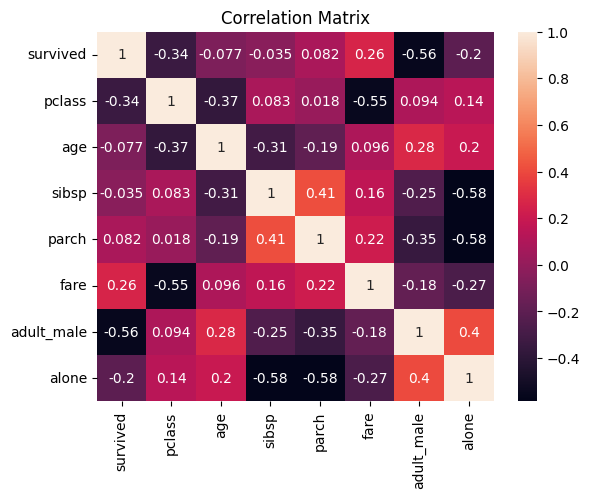

In [7]:
import seaborn as sns

# Calculate correlation matrix
correlation_matrix = data.corr()

# Heatmap
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()


Descriptive statistics provide a summary of the dataset, including measures such as mean, median, standard deviation, etc

In [8]:
# Descriptive statistics
descriptive_stats = data.describe()
print(descriptive_stats)


         survived      pclass         age       sibsp       parch        fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200


Missing values can affect the performance of our analysis and modeling. We need to handle them appropriately

In [9]:
# Drop rows with missing values
data = data.dropna()


In [10]:
# Impute missing values with mean
data['age'].fillna(data['age'].mean(), inplace=True)


Outliers are extreme values that deviate significantly from the majority of the data. Identifying and handling outliers can help improve the accuracy of our analysis.

In [11]:
from scipy.stats import zscore

# Calculate z-scores for numerical columns
z_scores = zscore(data[['age', 'fare']])

# Find outliers with z-score threshold of 3
outliers = (abs(z_scores) > 3).any(axis=1)

# Replace outliers with median value
data.loc[outliers, ['age', 'fare']] = data[['age', 'fare']].median()



Categorical columns need to be encoded into numerical values for machine learning models to process them effectively. 

In [ ]:
# Perform one-hot encoding
encoded_data = pd.get_dummies(data, columns=['sex', 'embarked'])


In order to build a predictive model, we need to separate the features (independent variables) from the target variable (dependent variable). The target variable in this case is 'Survived'.

In [ ]:
# Split into dependent and independent variables
X = encoded_data.drop('survived', axis=1)
y = encoded_data['survived']


Scaling the independent variables is important to ensure that all features have a similar range.

In [14]:
# Select the categorical columns for one-hot encoding
categorical_cols = ['sex', 'embarked']

# Perform one-hot encoding on the categorical variables
encoder = OneHotEncoder(drop='first')
X_encoded = encoder.fit_transform(X[categorical_cols])

# Perform feature scaling on the numerical variables
numeric_cols = X.select_dtypes(include=np.number).columns
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X[numeric_cols])

# Concatenate the scaled numerical variables and the encoded categorical variables
X_final = np.concatenate((X_scaled, X_encoded.toarray()), axis=1)

# Print the first few rows of the scaled X
print("Scaled X:")
print(X_final[:5])



NameError: ignored

To evaluate the performance of our predictive model, it's important to split the data into training and testing sets. The training set will be used to train the model, and the testing set will be used to evaluate its performance on unseen data.

In [15]:



from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X_final,y,test_size=0.2,random_state=0)
# Print the shapes of the resulting sets
print("Training set - X shape:", x_train.shape)
print("Training set - y shape:", y_train.shape)
print("Testing set - X shape:", x_test.shape)
print("Testing set - y shape:", y_test.shape)




NameError: ignored